In [1]:
import pandas as pd
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing 
import statsmodels.graphics.tsaplots as tsa_plots
from sklearn.metrics import mean_squared_error
from math import sqrt
import warnings

In [2]:
warnings.filterwarnings("ignore")
co2data = pd.read_csv("co2dataset.csv")
co2data.head()

,Year,CO2
0,1800,0.00568
1,1801,0.00561
2,1802,0.00555
3,1803,0.00548
4,1804,0.00542


In [3]:
# converting string data to datetime
co2data['Year'] = pd.to_datetime(co2data['Year'],format='%Y', errors='ignore')
co2data = co2data.set_index('Year')
co2data.head()

,CO2
Year,
1800-01-01,0.00568
1801-01-01,0.00561
1802-01-01,0.00555
1803-01-01,0.00548
1804-01-01,0.00542


In [4]:
co2data1 = co2data[70:]
co2data1

,CO2
Year,
1870-01-01,0.321
1871-01-01,0.461
1872-01-01,0.471
1873-01-01,0.406
1874-01-01,0.404
...,...
2010-01-01,15.600
2011-01-01,15.600
2012-01-01,14.800


<AxesSubplot:xlabel='Year', ylabel='CO2'>

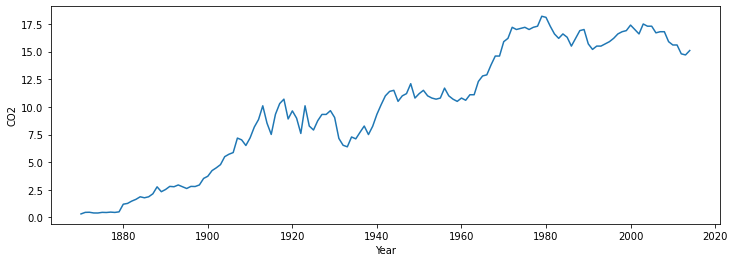

In [5]:
plt.figure(figsize=(12,4))
sns.lineplot(x='Year', y= 'CO2', data = co2data1)

0.8774104584367124 0.05912177175834734


<AxesSubplot:xlabel='Year'>

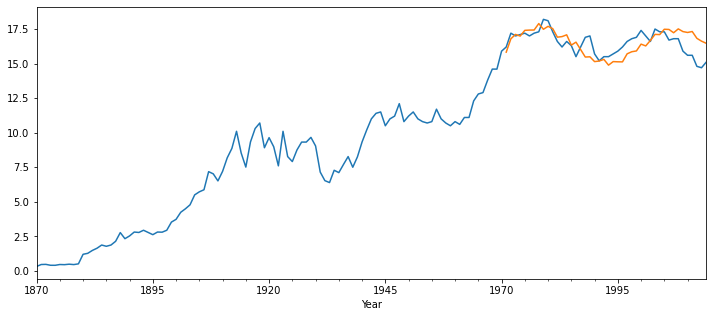

In [6]:
from statsmodels.tsa.arima.model import ARIMA
#train = co2data1
train = co2data1[:101]
test = co2data1[101:]

model_arima = ARIMA(train['CO2'],order=(17,1,15),enforce_stationarity= True,
      enforce_invertibility=True)
model= model_arima.fit()
pred_start=test.index[0]
pred_end = test.index[-1]
pred = model.predict(start= pred_start,end=pred_end)
pred_test_ARIMA = pred

rmse = sqrt(mean_squared_error(test.values, pred.values))
mape = np.mean(np.abs(test.values - pred.values)/np.abs(test.values))
print(rmse, mape)
co2data1['CO2'].plot(figsize=(12,5))
pred.plot()



<AxesSubplot:>

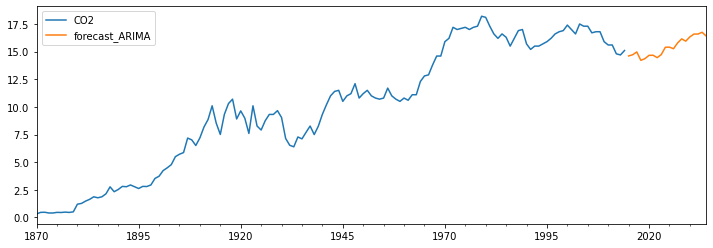

In [7]:
#train = co2data1
train = co2data1[:101]
test = co2data1[101:]

model_arima = ARIMA(co2data1['CO2'],order=(17,1,15),enforce_stationarity= True,
      enforce_invertibility=True)
model= model_arima.fit()

df1 = co2data1
from pandas.tseries.offsets import DateOffset
future_dates=[df1.index[-1]+ DateOffset(years=x)for x in range(0,21)]
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df1.columns)

future_datest_df.tail()

future_df_ARIMA=pd.concat([df1,future_datest_df])
future_df_ARIMA['forecast_ARIMA']= model.predict(start = future_df_ARIMA.index[145], end = 165)

future_df_ARIMA[['CO2', 'forecast_ARIMA']].plot(figsize=(12, 4))


In [8]:
import pickle 
pickle_out = open("arima_model.pkl", mode = "wb") 
pickle.dump(model, pickle_out) 
pickle_out.close()